In [44]:
import os
import csv

import numpy as np

from sklearn.metrics import matthews_corrcoef
from sklearn.manifold.t_sne import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
##Hierarchical clustering
def Hclust(data, n_clusters):
    best_silh = 0
    for n in range(2,20,1):
        hclust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        tmp_label = hclust.fit_predict(data).tolist()
        tmp_silh = silhouette_score(data, tmp_label)
        if tmp_silh > best_silh:
            best_silh = tmp_silh
            n_clust = n
            label = tmp_label
    return n_clust, label

## Clustering CNN+AE encoded vectors

In [45]:
disease_folder = 'autism'
date_time_folder = '2018-10-28-7-42-17'
experiment_folder = 'autism2018-10-28-18-1-9'

In [46]:
with open(os.path.expanduser('~/data1/complex_disorders/experiments/%s' % experiment_folder) + '/encoded_vect.csv') as f:
    rd = csv.reader(f)
    encoded_vect = []
    for r in rd:
        encoded_vect += [r]
for idx, e in enumerate(encoded_vect):
    encoded_vect[idx] = list(map(float, e))
        
with open(os.path.expanduser('~/data1/complex_disorders/experiments/%s' % experiment_folder) + '/mrns.csv') as f:
    rd = csv.reader(f)
    mrns = []
    for r in rd:
        mrns.append(r[0])
        
with open(os.path.expanduser('~/data1/complex_disorders/experiments/%s' % experiment_folder) + '/labels.csv') as f:
    rd = csv.reader(f)
    labels = []
    for r in rd:
        labels.append(r[0])

In [47]:
with open(os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease_folder, date_time_folder) + '/TRIMMEDordered_mrns.csv')) as f:
    rd = csv.reader(f)
    ordered_mrn = []
    for r in rd:
        ordered_mrn.append(r)
        
with open(os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease_folder, date_time_folder) + '/TRIMMEDordered_labels.csv')) as f:
    rd = csv.reader(f)
    ordered_labels = []
    for r in rd:
        ordered_labels.append(r[0])
        
with open(os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease_folder, date_time_folder) + '/TRIMMEDcohort-vocab.csv')) as f:
    rd = csv.reader(f)
    cohort_vocab = {}
    next(rd)
    for r in rd:
        cohort_vocab[int(r[1])] = r[0]
        
with open(os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease_folder, date_time_folder) + '/trimmed_ehrs.csv')) as f:
    rd = csv.reader(f)
    ehr = []
    for idx, r in enumerate(rd):
        ehr.append(list(map(int, r)))

In [52]:
best_sil = 0
for n in range(2,20,1):
    hclust = AgglomerativeClustering(n_clusters=n, linkage='ward')
    tmp_class = hclust.fit_predict(encoded_vect).tolist()
    tmp_score = silhouette_score(encoded_vect, tmp_class)
    print(tmp_score)
    if tmp_score > best_sil:
        best_sil = tmp_score
        n_clusters = n
        pred_class = tmp_class
        
print("Number of clusters found:{0}".format(n_clusters))
print("Silhouette score:{0}".format(best_sil))

0.06570864670431702
0.06764379113394235
0.06039993493205319
0.04026044780888148
0.0361038124731362
0.03366392692760471
0.03247078444420619
0.03262870824326947
0.017941201188796663
0.011025414241271646
0.010046318475383002
0.012528850566432553
0.013638930522911626
0.008338142752476827
0.011038795632725232
0.013349671310455212
0.016536402199276656
0.010091576179343973
Number of clusters found:3
Silhouette score:0.06764379113394235


In [49]:
colormap = {3: 'yellow', 2: 'orange', 1: 'green', 0: 'blue'}
colors = [colormap[int(v)] for v in labels]

In [50]:
##T-SNE
#encoded = encoded_vect.detach().cpu().numpy()
tsne = TSNE(n_components=2, n_iter=5000, perplexity=40, random_state=42)
X_tsne40 = tsne.fit_transform(encoded_vect)

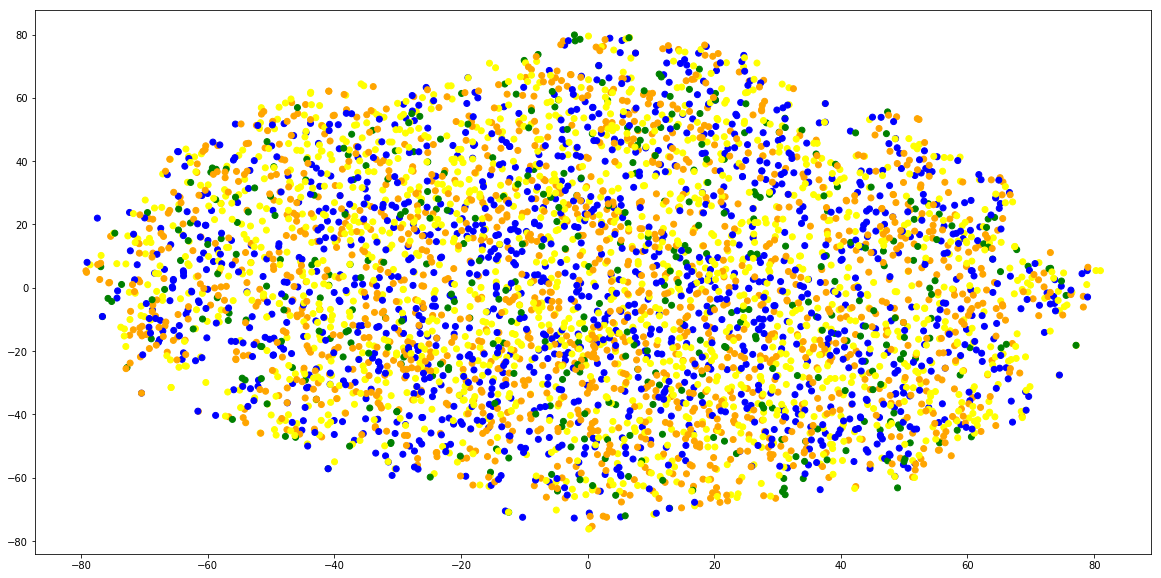

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(X_tsne40[:,0], X_tsne40[:,1], c=colors)

In [9]:
#12:"olive",11:"purple", 10:"wheat", 9:"yellowgreen", 8:"turquoise", 7:"lavender", 6:"grey", 5:"fuchsia", 4:"pink", 3: "red", 2: 'orange'
colormap = {1: 'green', 0: 'blue'}
colors = [colormap[v] for v in pred_class]

([], <a list of 0 Text yticklabel objects>)

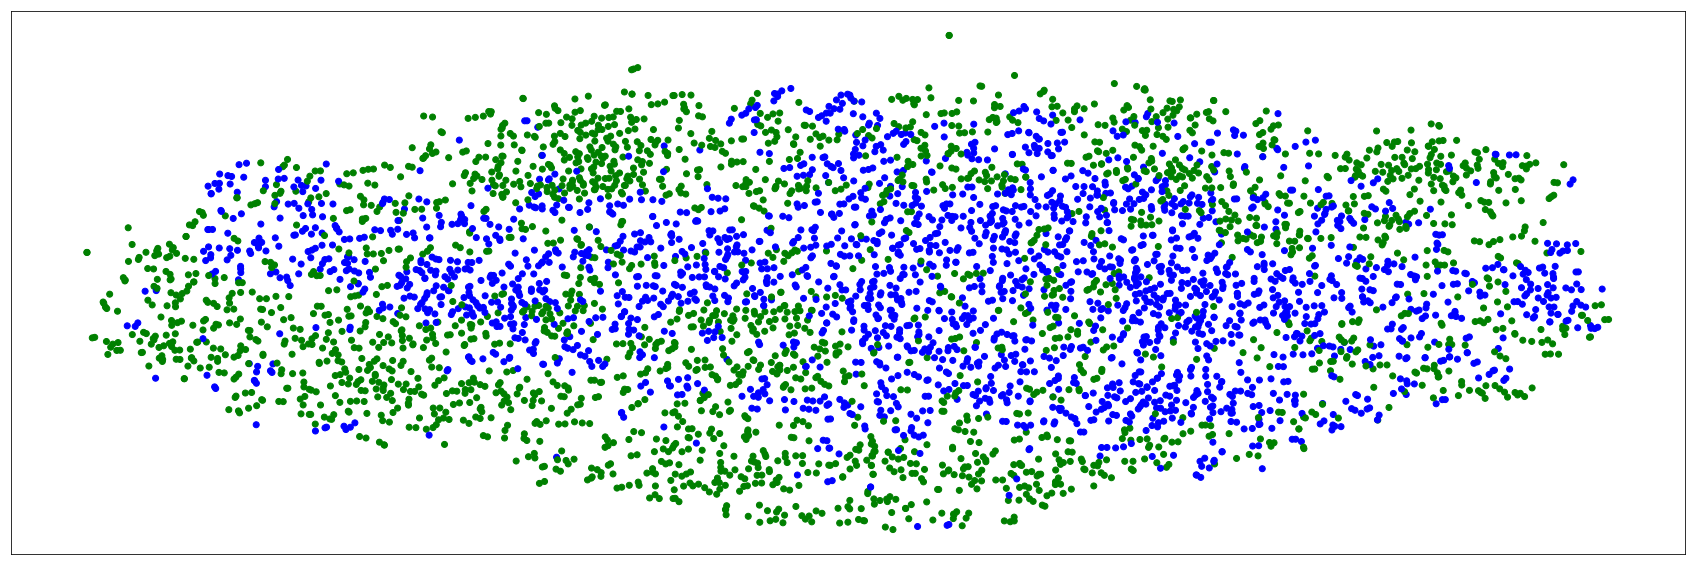

In [10]:
plt.figure(figsize=(30,10))
plt.scatter(X_tsne40[:,0], X_tsne40[:,1], c=colors)
plt.xticks([])
plt.yticks([])

In [11]:
scaler = StandardScaler()
raw_data_scaled = scaler.fit_transform(ehr)

In [17]:
colormap = {3: 'yellow', 2: 'orange', 1: 'green', 0: 'blue'}
colors = [colormap[int(v)] for v in ordered_labels]

In [13]:
##T-SNE
#encoded = encoded_vect.detach().cpu().numpy()
tsne = TSNE(n_components=2, n_iter=5000, perplexity=40, random_state=42)
X_tsne40 = tsne.fit_transform(raw_data_scaled)

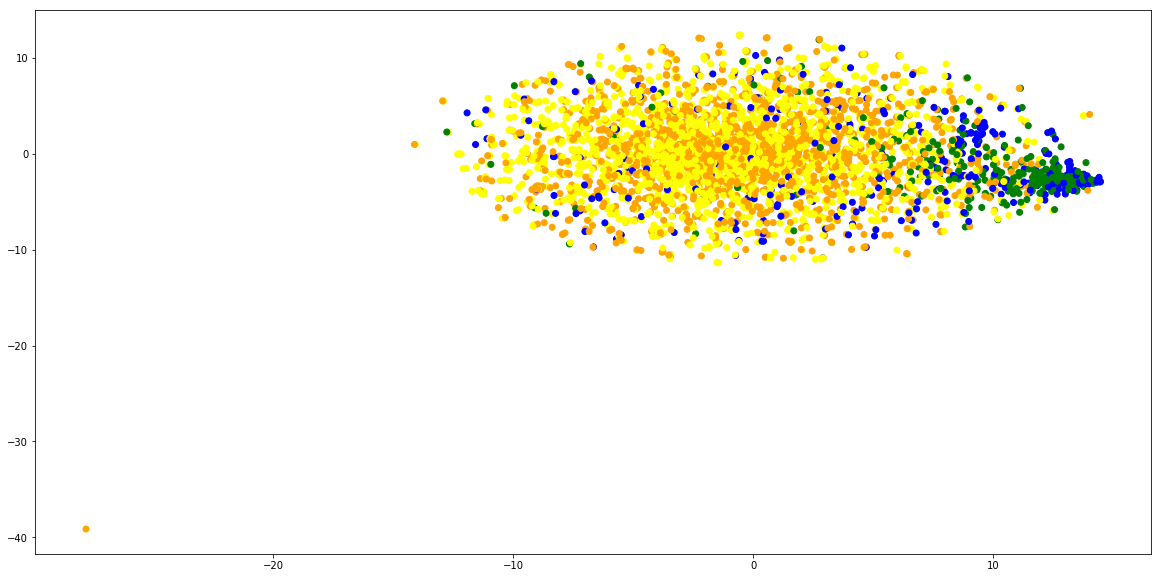

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(X_tsne40[:,0], X_tsne40[:,1], c=colors)

In [20]:
best_sil = 0
for n in range(2,20,1):
    hclust = AgglomerativeClustering(n_clusters=n, linkage='complete')
    tmp_class = hclust.fit_predict(raw_data_scaled).tolist()
    tmp_score = silhouette_score(raw_data_scaled, tmp_class)
    print(tmp_score)
    if tmp_score > best_sil:
        best_sil = tmp_score
        n_clusters = n
        pred_class = tmp_class
        
print("Number of clusters found:{0}".format(n_clusters))
print("Silhouette score:{0}".format(best_sil))

0.5839864545278584
0.5633711837706199
0.44412112875106624
0.44410449331327567
0.4419428082905151
0.33614017920122885
0.33619314880266027
0.3362981998602659
0.333254675750838
0.33325334685820407
0.3332834710177788
0.3334693058741904
0.3335147315686852
0.3336007946402315
0.3336136887161403
0.3090680422101827
0.30908801762075855
0.3091936798135786
Number of clusters found:2
Silhouette score:0.5839864545278584


([], <a list of 0 Text yticklabel objects>)

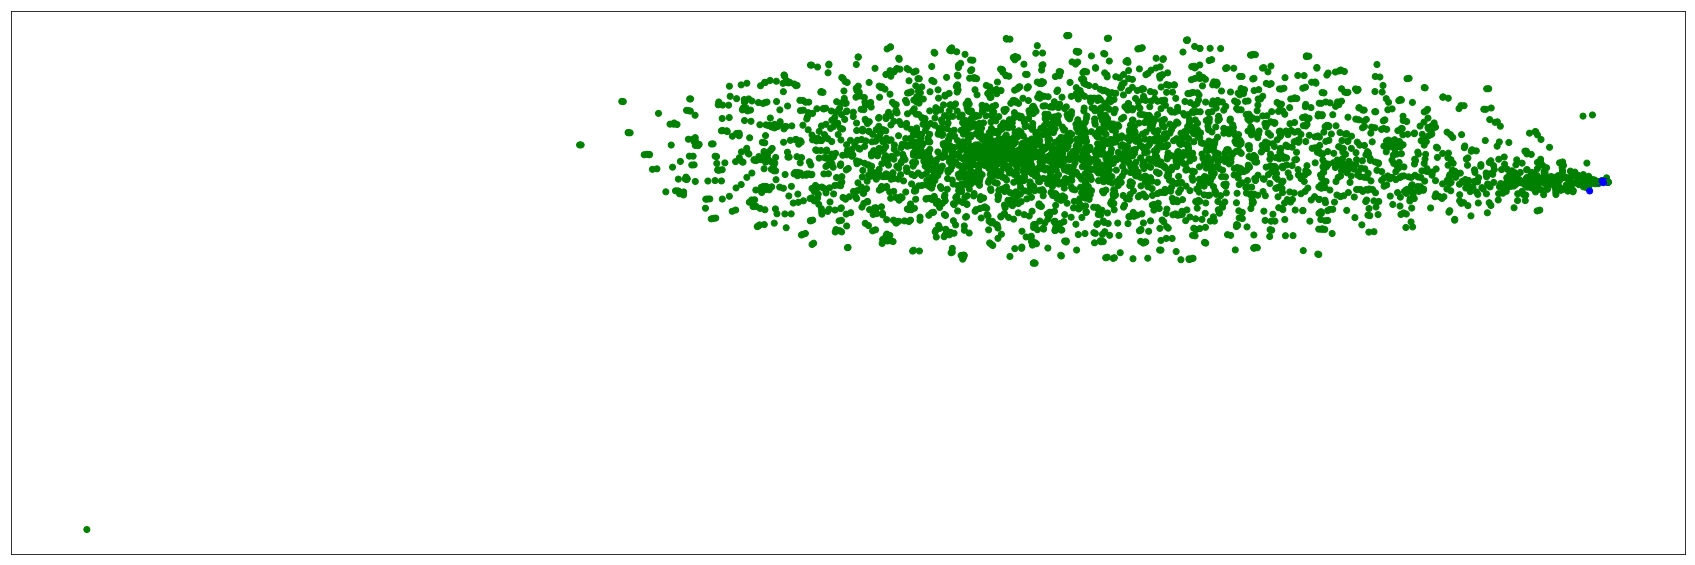

In [21]:
#12:"olive",11:"purple", 10:"wheat", 9:"yellowgreen", 8:"turquoise", 7:"lavender", 6:"grey", 5:"fuchsia", 4:"pink", 3: "red", 2: 'orange'
colormap = {1: 'green', 0: 'blue'}
colors = [colormap[v] for v in pred_class]

plt.figure(figsize=(30,10))
plt.scatter(X_tsne40[:,0], X_tsne40[:,1], c=colors)
plt.xticks([])
plt.yticks([])

In [25]:
def svd_tfidf(data, vocab):
    
    count_mat = np.zeros((len(data), len(vocab)))
    
    for idx, token_list in enumerate(data):
        for t in token_list:
            if t != 0:
                count_mat[idx, t-1] +=1
                
    tfidf = TfidfTransformer()
    tfidf_mat = tfidf.fit_transform(count_mat)
    
    svd = TruncatedSVD(n_components=100)
    svd_mat = svd.fit_transform(tfidf_mat)
    
    return svd_mat

In [26]:
out_tfidf = svd_tfidf(ehr, cohort_vocab)

In [32]:
best_sil = 0
for n in range(2,20,1):
    hclust = AgglomerativeClustering(n_clusters=n, linkage='ward')
    tmp_class = hclust.fit_predict(out_tfidf).tolist()
    tmp_score = silhouette_score(out_tfidf, tmp_class)
    print(tmp_score)
    if tmp_score > best_sil:
        best_sil = tmp_score
        n_clusters = n
        pred_class = tmp_class
        
print("Number of clusters found:{0}".format(n_clusters))
print("Silhouette score:{0}".format(best_sil))

0.10914604928915272
0.08657221958879878
0.09039545725709314
0.09328126878882506
0.09085230773086793
0.055073371608140624
0.06103159451596252
0.04658993405665406
0.04981157187255369
0.05585285109122038
0.05948253572874093
0.060174157245273883
0.06374102420991543
0.06690234635943391
0.06807890028525683
0.07126981203787218
0.06955754794360777
0.06876887038288391
Number of clusters found:2
Silhouette score:0.10914604928915272


In [28]:
colormap = {3: 'yellow', 2: 'orange', 1: 'green', 0: 'blue'}
colors = [colormap[int(v)] for v in ordered_labels]

In [29]:
##T-SNE
#encoded = encoded_vect.detach().cpu().numpy()
tsne = TSNE(n_components=2, n_iter=5000, perplexity=40, random_state=42)
X_tsne40 = tsne.fit_transform(out_tfidf)

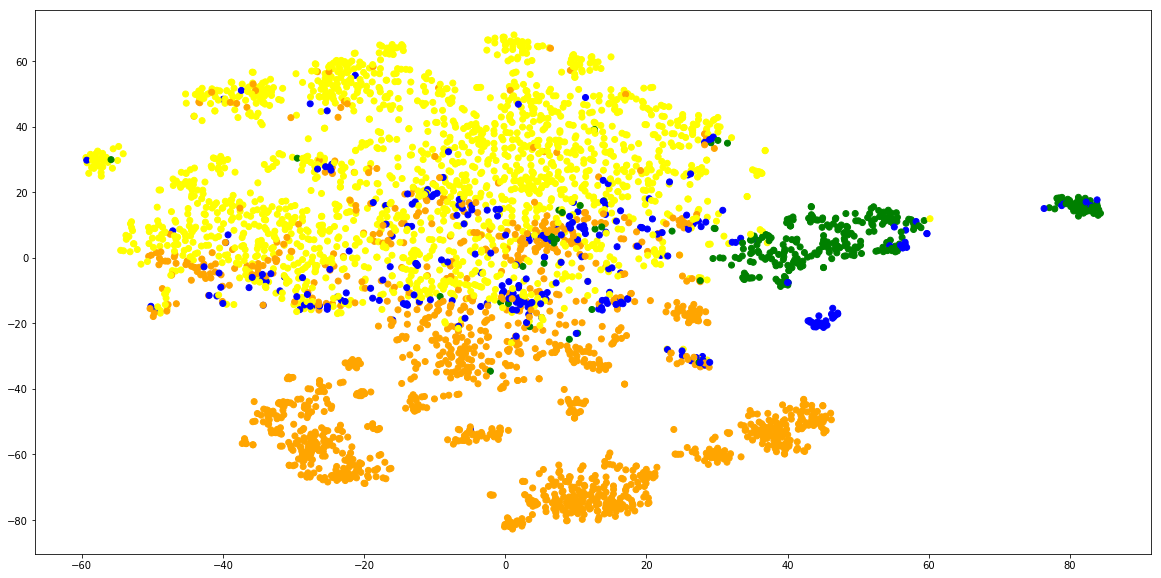

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(X_tsne40[:,0], X_tsne40[:,1], c=colors)

([], <a list of 0 Text yticklabel objects>)

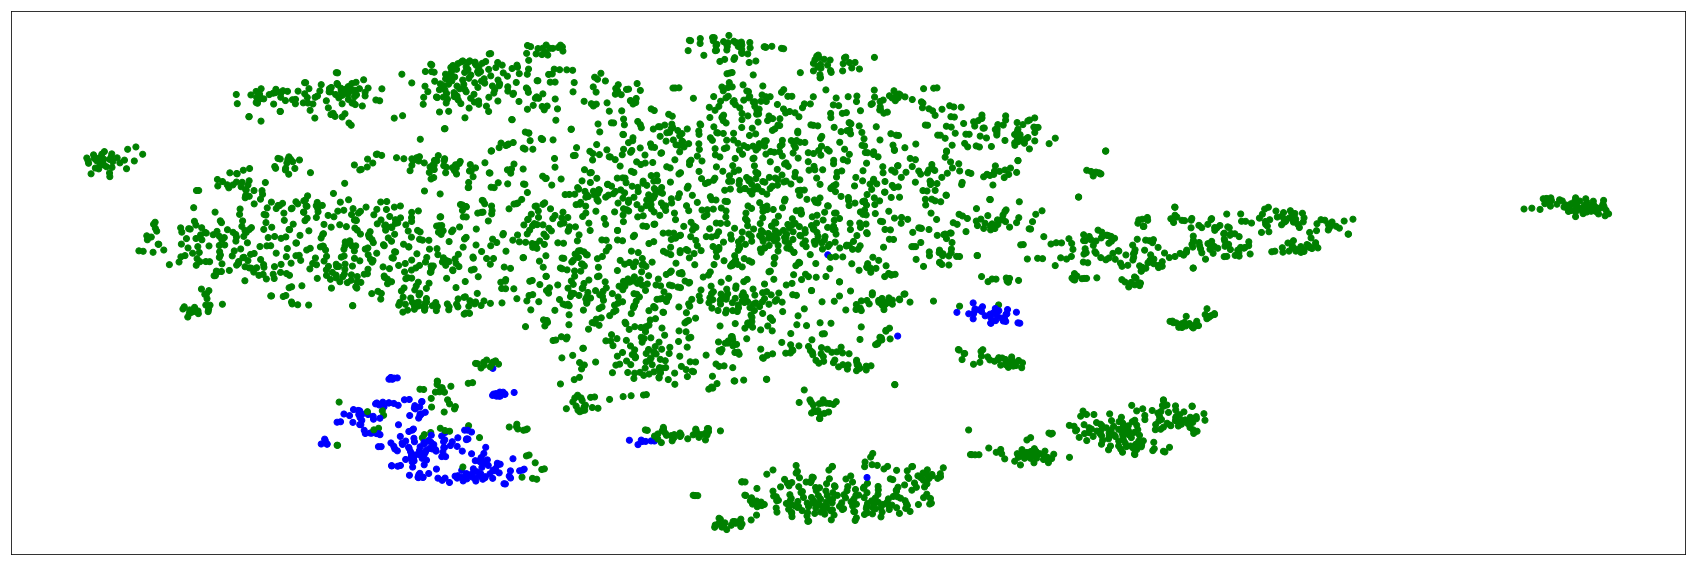

In [31]:
#12:"olive",11:"purple", 10:"wheat", 9:"yellowgreen", 8:"turquoise", 7:"lavender", 6:"grey", 5:"fuchsia", 4:"pink", 3: "red", 2: 'orange'
colormap = {1: 'green', 0: 'blue'}
colors = [colormap[v] for v in pred_class]

plt.figure(figsize=(30,10))
plt.scatter(X_tsne40[:,0], X_tsne40[:,1], c=colors)
plt.xticks([])
plt.yticks([])